In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import glob
from netCDF4 import Dataset

import cartopy.feature
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

import statsmodels.stats.api as sms
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr

import calendar
from numpy import cov


In [2]:
file_name = 'C:/Users/bb26k/Desktop/Infra_structure_exercise/KIT_F&GBB_W/KIT_F/Insitu/GT_MDB_IS_INSIT_KIT_F-20210101_0000XX-KKIT-0.00X0.00-V.1.0.nc'
data = xr.open_dataset(file_name)

fnames=sorted(glob.glob("C:/Users/bb26k/Desktop/KIT_F&GBB_W/KIT_F/Insitu/GT_MDB_IS_INSIT_KIT_F-20210101_0000XX-KKIT-0.00X0.00-V.1.0.nc"))


                   LST_Day_1km
system:time_start             
2021-01-01              276.68
2021-01-02                 NaN
2021-01-03                 NaN
2021-01-04                 NaN
2021-01-05                 NaN
...                        ...
2022-01-03                 NaN
2022-01-04                 NaN
2022-01-05                 NaN
2022-01-06                 NaN
2022-01-07                 NaN

[372 rows x 1 columns]


Text(0.5, 0, 'date')

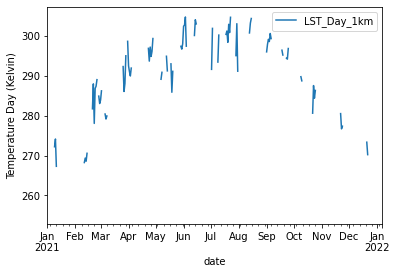

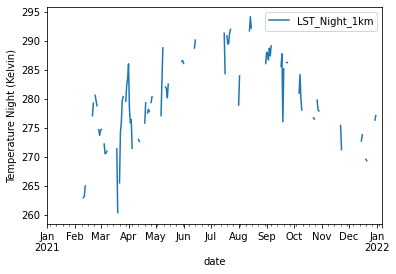

In [12]:
df = pd.read_csv('ee-chart.csv', index_col='system:time_start', parse_dates=True)
df2 = pd.read_csv('ee-chart_night.csv', index_col='system:time_start', parse_dates=True)
print(df)

ax=df.plot()
ax2=df2.plot()

ax.set_ylabel('Temperature Day (Kelvin)')
ax.set_xlabel('date')

ax2.set_ylabel('Temperature Night (Kelvin)')
ax2.set_xlabel('date')


372


Text(0.5, 0, 'date')

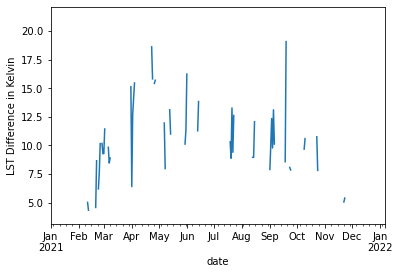

In [17]:
print(len(df))

for i in range(len(df)):
    #    df['diff']=df['LST_Day_1km'][i]-df2['LST_Night_1km'] First run this. Then below one.
    df['diff'][i]=df['LST_Day_1km'][i]-df2['LST_Night_1km'][i] 
    
ax=df['diff'].plot()
ax.set_ylabel('LST Difference in Kelvin')
ax.set_xlabel('date')

<AxesSubplot:xlabel='system:time_start'>

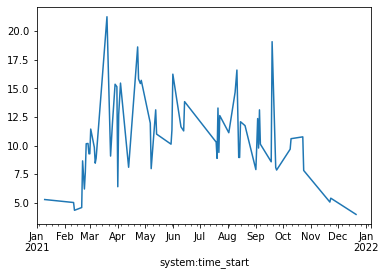

In [20]:
df['interpolated']=df['diff'].interpolate(method='polynomial', order=1)
df['interpolated'].plot()

Text(0.5, 0, 'date')

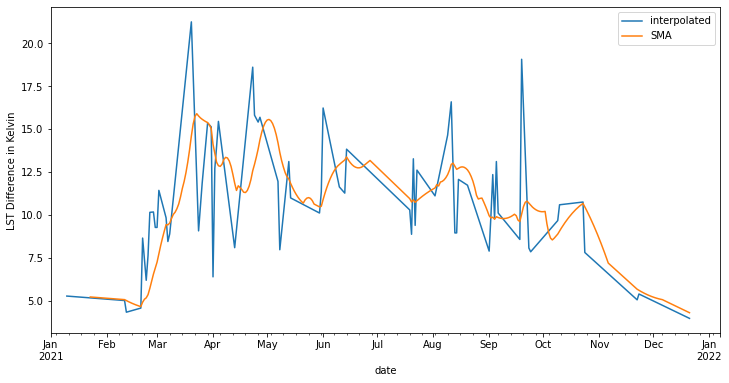

In [21]:
df['SMA']=df['diff'].interpolate(method='polynomial',order=1).rolling(window=14).mean()
ax=df.plot(y=['interpolated','SMA'],figsize=(12,6))
ax.set_ylabel('LST Difference in Kelvin')
ax.set_xlabel('date')

In [23]:
df.loc[df['SMA'] == df['SMA'].max()]

,LST_Day_1km,diff,interpolated,SMA
system:time_start,,,,
2021-03-23,NaN,NaN,12.125,15.908571


In [24]:
df.loc[df['SMA'] == df['SMA'].min()]

,LST_Day_1km,diff,interpolated,SMA
system:time_start,,,,
2021-12-21,273.34,3.98,3.98,4.309643


In [25]:
print('mean sma =' , df['SMA'].mean())
print('max diff sma=', df['SMA'].max())
print('min diff sma=', df['SMA'].min())

std=df['SMA'].std()
print('SD sma= ', df['SMA'].std())


SD1_pos_sma=df['SMA'].mean() + std
SD1_neg_sma=df['SMA'].mean() - std



mean sma = 10.044062097812091
max diff sma= 15.908571428571415
min diff sma= 4.309642857142835
SD sma=  3.135235188923191


In [26]:
print('mean  =' , df['interpolated'].mean())
print('max diff =', df['interpolated'].max())
print('min diff =', df['interpolated'].min())

std=df['interpolated'].std()
print('SD = ', df['interpolated'].std())


SD1_pos=df['interpolated'].mean() + std
SD1_neg=df['interpolated'].mean() - std


mean  = 9.843843930635831
max diff = 21.25999999999999
min diff = 3.9799999999999613
SD =  3.6273158959388643


In [27]:
counter1=0
df['SMA'].count()
for i in range(df['SMA'].count()):
    if df['SMA'][i] < SD1_pos_sma and df['SMA'][i] > SD1_neg_sma:
        counter1=counter1+1
print(counter1, df['SMA'].count())
print('ratio values under the SD1 (SMA)', counter1 / df['SMA'].count())


counter2=0
df['interpolated'].count()
for i in range(df['interpolated'].count()):
    if df['interpolated'][i] < SD1_pos and df['interpolated'][i] > SD1_neg:
        counter2=counter2+1
print(counter2, df['interpolated'].count())
print('ratio values under the SD1', counter2 / df['interpolated'].count())


218 333
ratio values under the SD1 (SMA) 0.6546546546546547
211 346
ratio values under the SD1 0.6098265895953757


(array([78., 21., 39., 72., 60., 41., 21.,  7.,  5.,  2.]),
 array([ 3.98 ,  5.708,  7.436,  9.164, 10.892, 12.62 , 14.348, 16.076,
        17.804, 19.532, 21.26 ]),
 <BarContainer object of 10 artists>)

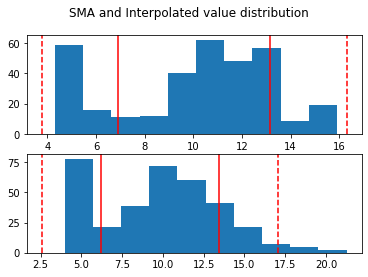

In [28]:
fig, axs = plt.subplots(2)
fig.suptitle('SMA and Interpolated value distribution')


axs[0].axvline(np.mean(df['SMA'])-np.std(df['SMA']),c='r')
axs[0].axvline(np.mean(df['SMA'])+np.std(df['SMA']),c='r')

axs[0].axvline(np.mean(df['SMA'])- 2*np.std(df['SMA']),c='r',linestyle='--')
axs[0].axvline(np.mean(df['SMA'])+ 2*np.std(df['SMA']),c='r',linestyle='--')

axs[0].hist(df['SMA'])


axs[1].axvline(np.mean(df['interpolated'])-np.std(df['interpolated']),c='r')
axs[1].axvline(np.mean(df['interpolated'])+np.std(df['interpolated']),c='r')

axs[1].axvline(np.mean(df['interpolated'])- 2*np.std(df['interpolated']),c='r',linestyle='--')
axs[1].axvline(np.mean(df['interpolated'])+ 2*np.std(df['interpolated']),c='r',linestyle='--')

axs[1].hist(df['interpolated'])

,LST_Day_1km,diff,interpolated,SMA,diff_method
system:time_start,,,,,
2021-09-19,295.16,19.08,19.08,10.045,81.631225


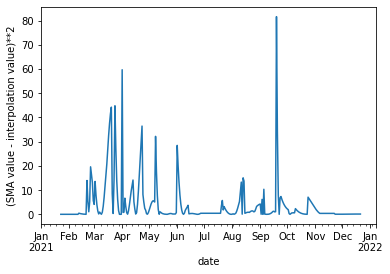

In [29]:
df['diff_method']=(df['SMA']-df['interpolated'])**2
ax=df['diff_method'].plot()
ax.set_ylabel('(SMA value - interpolation value)**2')
ax.set_xlabel('date')
df.loc[df['diff_method'] == df['diff_method'].max()]

In [22]:
data2={}       
for j in fnames:    
    if bool(j)==True:
        print(j)
        nc = Dataset(j,'r')
        var=list(nc.variables.keys())
        svar=['range','range_hr']  #name of variables which should  only be imported for the first file as they are constant
        rvar=[]  # names of variable which should not be imported 
        for s in svar:
            var.remove(s)
        for s in rvar:
            var.remove(s)
        if bool(data2)==False:
            print('first file')
            dim_info=nc.dimensions             
            for v in var:
                data2[v]=nc.variables[v][:]
            for v in svar:
                data2[v]=nc.variables[v][:]
        else:
            print('append file')
            for v in var:
                if data2[v].ndim>1:                        
                    data2[v]=np.ma.append(data2[v],nc.variables[v][:],axis=0)
                else:
                    data2[v]=np.ma.append(data2[v],nc.variables[v][:])
            for v in svar:
                data2[v]=np.column_stack((data2[v],nc.variables[v][:]))
         
            nc.close()
 


In [4]:
data

<xarray.Dataset>
Dimensions:          (time: 524004, sensor: 1)
Coordinates:
  * time             (time) object 2021-01-01 23:01:00 ... 2022-01-01 23:00:00
    jul_date         (time) object ...
    lat              (time) float32 ...
    lon              (time) float32 ...
Dimensions without coordinates: sensor
Data variables:
    elevation        (time) float64 ...
    LST              (time) float32 ...
    LST_uncertainty  (time) float32 ...
    LSBT_1           (sensor, time) float32 ...
    BT_sky           (time) float32 ...
    emis             (sensor, time) float32 ...
    t200m            (time) float32 ...
    rh200m           (time) float32 ...
    lcc              (time) float32 ...

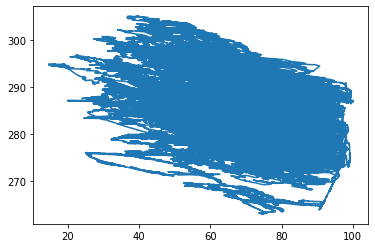

In [5]:
y1=data.rh200m
y2=data.t200m  
x=data.time

plt.plot(y1,y2)

Text(0, 0.5, 'humidity')

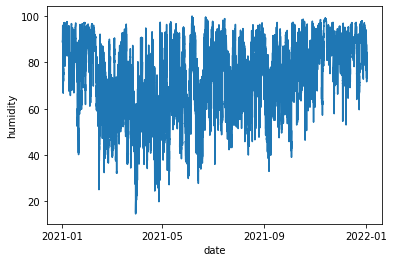

In [6]:
plt.plot(x,y1)
plt.xlabel('date')
plt.ylabel('humidity')

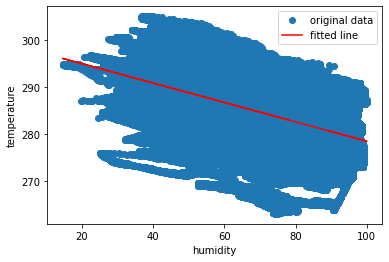

In [7]:
mask = ~np.isnan(y1) & ~np.isnan(y2)
slope, intercept, r_value, p_value, std_err = stats.linregress(y1[mask],y2[mask])

plt.plot(y1,y2, 'o', label='original data')
plt.plot(y1, intercept + slope*y1, 'r', label='fitted line')
plt.xlabel('humidity')
plt.ylabel('temperature')
plt.legend()
plt.show()

#y1.astype('float64').corr(y2.astype('float64'))

In [8]:


y1_array=np.array(y1)
y2_array=np.array(y2).reshape(-1,1)
print(y1_array)
print(y2_array)

[89.2  89.28 89.36 ... 78.1  77.7  78.03]
[[274.71]
 [274.69]
 [274.68]
 ...
 [283.66]
 [283.65]
 [283.62]]


14.53
100.0
263.01
305.11


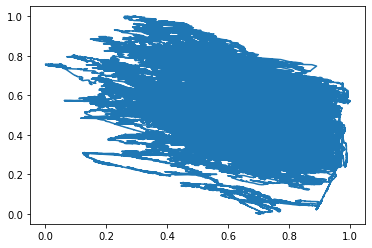

In [9]:
y1_min = y1_array.min()
y1_max = y1_array.max()
print(y1_min)
print(y1_max)
normalized_y1=[]
normalized_y2=[]
for i in range (len(y1_array)):
    normalized_y1.append((y1_array[i] - y1_min) / (y1_max - y1_min))
    
#print(normalized_y1)    


y2_min = y2_array.min()
y2_max = y2_array.max()

print(y2_min)
print(y2_max)

for i in range (len(y2_array)):
    normalized_y2.append((y2_array[i] - y2_min) / (y2_max - y2_min))
    
#print(normalized_y2)    
plt.plot(normalized_y1,normalized_y2)    

In [10]:
mask = ~np.isnan(normalized_y1) & ~np.isnan(normalized_y2)
slope, intercept, r_value, p_value, std_err = stats.linregress(normalized_y1[mask],normalized_y2[mask])

plt.plot(normalized_y1,normalized_y2, 'o', label='original data')
plt.plot(normalized_y1, intercept + slope*normalized_y1, 'r', label='fitted line')
plt.xlabel('humidity')
plt.ylabel('temperature')
plt.legend()
plt.show()

MemoryError: Unable to allocate 256. GiB for an array with shape (524004, 524004) and data type bool

In [11]:
np.corrcoef(y1,y2)


array([[ 1.        , -0.44663956],
       [-0.44663956,  1.        ]])